In [21]:
import pandas as pd
import numpy as np
from plotnine import *


mydata = pd.DataFrame(dict(Name=['A', 'B', 'C', 'D', 'E'],
                           Scale=[35, 30, 20, 10, 5],
                           ARPU=[56, 37, 63, 57, 59]))

# 构造矩形X轴的起点（最小点）
mydata.loc[:, 'xmin'] = 0
for i in range(1, 5):
    # mydata['xmin'][i] = np.sum(mydata['Scale'][0:i])
    mydata.at[i, 'xmin'] = np.sum(mydata['Scale'][0:i])

# 构造矩形X轴的终点（最大点）
mydata.loc[:, 'xmax'] = 0
for i in range(0, 5):
    # mydata['xmax'][i] = np.sum(mydata['Scale'][0:i+1])
    mydata.at[i, 'xmax'] = np.sum(mydata['Scale'][0:i+1])

mydata.loc[:, 'label'] = 0
for i in range(0, 5):
    # mydata['label'][i] = np.sum(mydata['Scale'][0:i+1])-mydata['Scale'][i]/2
    mydata.at[i, 'label'] = np.sum(mydata['Scale'][0:i+1])-mydata['Scale'][i]/2

display(mydata)

,Name,Scale,ARPU,xmin,xmax,label
0,A,35,56,0,35,17
1,B,30,37,35,65,50
2,C,20,63,65,85,75
3,D,10,57,85,95,90
4,E,5,59,95,100,97


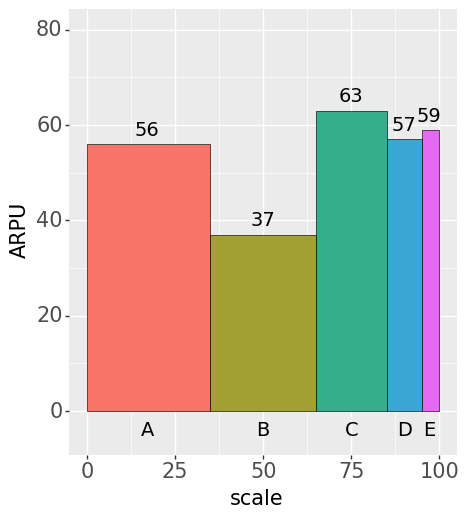

<ggplot: (124128909906)>


In [20]:
base_plot = (ggplot(mydata) +
             geom_rect(aes(xmin='xmin', xmax='xmax', ymin=0, ymax='ARPU', fill='Name'), colour="black", size=0.25) +
             geom_text(aes(x='label', y='ARPU+3', label='ARPU'), size=14, color="black") +
             geom_text(aes(x='label', y=-4, label='Name'), size=14, color="black") +
             scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
             ylab("ARPU") +
             xlab("scale") +
             ylim(-5, 80) +
             theme(  # panel_background=element_rect(fill="white"),
    #panel_grid_major = element_line(colour = "grey",size=.25,linetype ="dotted" ),
    #panel_grid_minor = element_line(colour = "grey",size=.25,linetype ="dotted" ),
    text=element_text(size=15),
    legend_position="none",
    aspect_ratio=1.15,
    figure_size=(5, 5),
    dpi=100
))
print(base_plot)